# Hồi quy đơn biến: dự đoán giá nhà thông qua diện tích căn nhà

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

df = pd.read_csv("C:/Users/ADMIN/Downloads/Data/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [155]:
df = df[["price","area"]]
df

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
...,...,...
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910


# Chuẩn hóa dữ liệu

In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Chọn các cột cần chuẩn hóa
columns = ["price","area"]


# Chuẩn hóa dữ liệu và gán lại cho DataFrame
df[columns] = scaler.fit_transform(df[columns])

# In DataFrame sau khi chuẩn hóa
df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3760\104366149.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = scaler.fit_transform(df[columns])


,price,area
0,4.566365,1.046726
1,4.004484,1.757010
2,4.004484,2.218232
3,3.985755,1.083624
4,3.554979,1.046726
...,...,...
540,-1.576868,-0.991879
541,-1.605149,-1.268613
542,-1.614327,-0.705921
543,-1.614327,-1.033389


# Xử lí các Outlier bằng giá trị trung bình

## Trực quan hóa trước khi xử lí các giá trị Outlier 

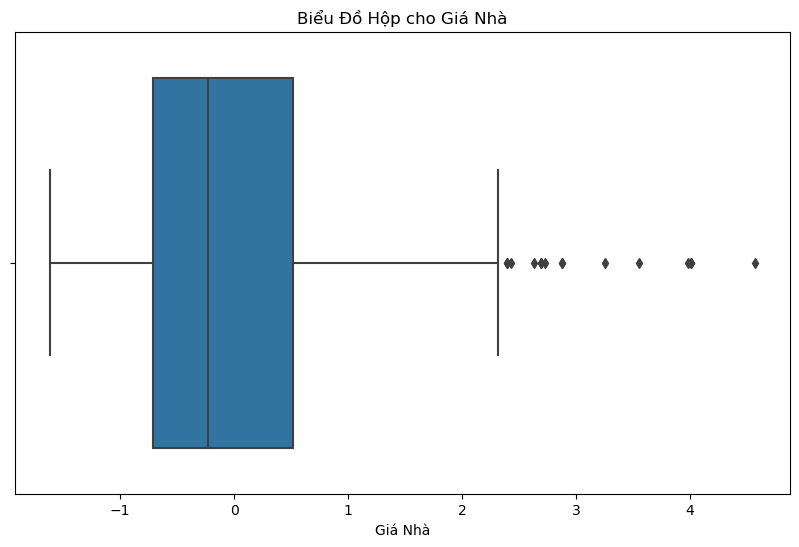

In [157]:
# Vẽ biểu đồ hộp cho giá nhà
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('Biểu Đồ Hộp cho Giá Nhà')
plt.xlabel('Giá Nhà')

# Thêm chú thích
plt.annotate('Outliers', xy=(0.5, df['price'].max()), xytext=(0.5, df['price'].max() + 500000),
             arrowprops=dict(facecolor='red', arrowstyle='wedge,tail_width=0.7', lw=1),
             fontsize=10, color='red', ha='center', va='center')

plt.show()

## Xử lí các giá trị Outlier

In [158]:
# Tính toán z-score
z_scores = (df[columns] - df[columns].mean()) / df[columns].std()

# Xác định ngưỡng z-score (ví dụ: ngưỡng = 3)
threshold = 3

# Xác định các giá trị ngoại lệ
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Thay thế giá trị ngoại lệ bằng giá trị trung bình
df[columns] = np.where(outliers, df[columns].mean(), df[columns])

# In DataFrame sau khi thay thế giá trị ngoại lệ bằng giá trị trung bình
df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3760\687270342.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = np.where(outliers, df[columns].mean(), df[columns])


,price,area
0,2.085997e-16,1.046726
1,2.085997e-16,1.757010
2,2.085997e-16,2.218232
3,2.085997e-16,1.083624
4,2.085997e-16,1.046726
...,...,...
540,-1.576868e+00,-0.991879
541,-1.605149e+00,-1.268613
542,-1.614327e+00,-0.705921
543,-1.614327e+00,-1.033389


## Trực quan hóa sau khi xử lí các giá trị Outlier 

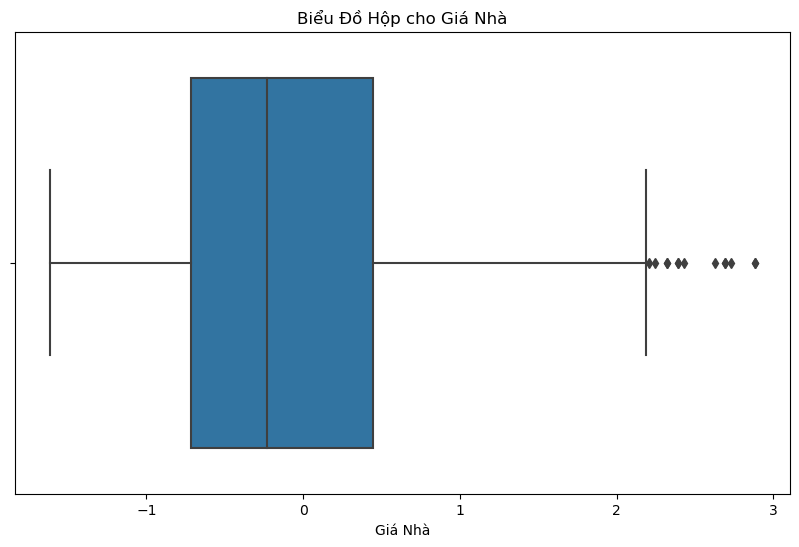

In [159]:
# Vẽ biểu đồ hộp cho giá nhà
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('Biểu Đồ Hộp cho Giá Nhà')
plt.xlabel('Giá Nhà')

# Thêm chú thích
plt.annotate('Outliers', xy=(0.5, df['price'].max()), xytext=(0.5, df['price'].max() + 500000),
             arrowprops=dict(facecolor='red', arrowstyle='wedge,tail_width=0.7', lw=1),
             fontsize=10, color='red', ha='center', va='center')

plt.show()



# Chia mô hình

In [160]:
area = df.iloc[:,1].values.reshape(-1, 1)
price = df.iloc[:,:-1].values

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(area, price, test_size = 0.2, random_state = 42)

# Tạo mô hình và dự đoán

In [162]:
# Tạo mô hình hồi quy
model = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán giá trên tập kiểm tra
y_pred = model.predict(X_test)
print(y_pred)

[[ 0.13781091]
 [ 0.27926337]
 [-0.30069172]
 [-0.07436778]
 [-0.31955205]
 [ 0.33112928]
 [ 0.75548666]
 [-0.07672532]
 [-0.48929501]
 [-0.61660222]
 [ 0.76963191]
 [-0.32568166]
 [-0.37613304]
 [-0.52230058]
 [-0.31719451]
 [-0.3973509 ]
 [-0.78163009]
 [ 0.16138632]
 [ 0.12602321]
 [ 0.16138632]
 [-0.0696527 ]
 [ 0.35588346]
 [-0.39287158]
 [-0.35727271]
 [ 0.69183306]
 [ 1.09497257]
 [-0.52465812]
 [-0.54587599]
 [-0.03887706]
 [-0.54587599]
 [-0.31012189]
 [-0.5175855 ]
 [ 0.16138632]
 [ 0.3063751 ]
 [-0.12741246]
 [-0.16866942]
 [-0.15782474]
 [-0.50344025]
 [-0.43271402]
 [-0.59609161]
 [ 0.62817945]
 [-0.3973509 ]
 [ 0.26040305]
 [-0.26297107]
 [ 0.3382019 ]
 [ 0.1342746 ]
 [ 0.16138632]
 [-0.15923926]
 [ 0.64468224]
 [-0.54587599]
 [ 0.50912363]
 [-0.54587599]
 [ 0.57867109]
 [-0.19224483]
 [-0.39499336]
 [-0.56709386]
 [ 0.1024478 ]
 [-0.68732845]
 [ 0.26747567]
 [-0.35727271]
 [-0.50344025]
 [-0.74980329]
 [ 0.26511813]
 [-0.08379795]
 [ 0.0105037 ]
 [-0.36670287]
 [ 0.30283

#  Trực quan hóa mô hình

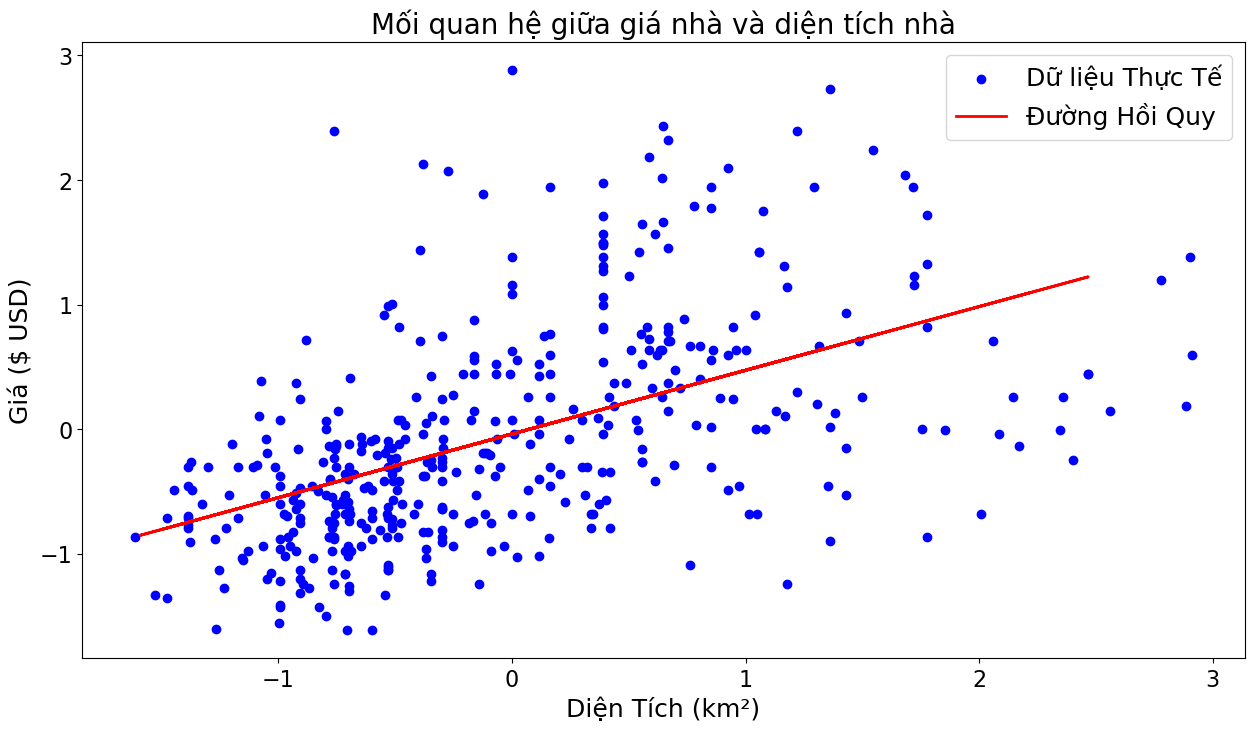

In [163]:
# Trực quan hóa mô hình hồi quy trên tập dữ liệu huấn luyện
plt.figure(figsize=(15, 8))
plt.scatter(X_train, y_train, color='blue', label='Dữ liệu Thực Tế')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Đường Hồi Quy')
plt.title('Mối quan hệ giữa giá nhà và diện tích nhà',fontsize=20)
plt.xlabel('Diện Tích (km²)',fontsize=18)
plt.ylabel('Giá ($ USD)',fontsize=18)
plt.tick_params(axis='x', labelsize=16) 
plt.tick_params(axis='y', labelsize=16)  
plt.legend(fontsize=18)
plt.show()


# Đánh giá hiệu suất mô hình

In [164]:
# Đánh giá hiệu suất của mô hình
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))

# In hệ số và sai số chệch của mô hình
print('\nHệ số hồi quy:')
print(model.coef_)

print('\nSai số chệch (intercept):')
print(model.intercept_)


Mean Absolute Error: 0.7539885993297082
Mean Squared Error: 0.8931468647586078
Root Mean Squared Error: 0.9450644765086708
R-squared: 0.20473708493523923

Hệ số hồi quy:
[[0.51115006]]

Sai số chệch (intercept):
[-0.03887706]
